In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

In [2]:
# Add the directory containing diffusive_nested_sampling to sys.path
sys.path.append(os.path.abspath( "../.."))
import spike_and_slab

In [3]:
# Likelihood function
def likelihood(x):
    '''
    20-D spike and slab likelihood function

    @param x : coordinate
    @return L : likelihood
    '''
    u = 0.01
    v = 0.1

    # Spike
    t1 = np.sum(-0.5 * (x / v) ** 2) - x.size * np.log(v * np.sqrt(2 * np.pi))
    
    # Slab
    t2 = np.sum(-0.5 * ((x - 0.031) / u) ** 2) - x.size * np.log(u * np.sqrt(2 * np.pi))
    
    return (np.exp(t1) + (100 * np.exp(t2)))

(-0.5, 0.5)

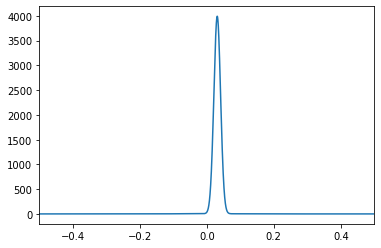

In [4]:
x = np.linspace(-0.5, 0.5, 10000)
y = [likelihood(x_i) for x_i in x]
plt.plot(x, y)
plt.xlim(-0.5, 0.5)

In [5]:
chain, levels, js = spike_and_slab.main()

100%|██████████| 130/130 [11:00<00:00,  5.08s/it]


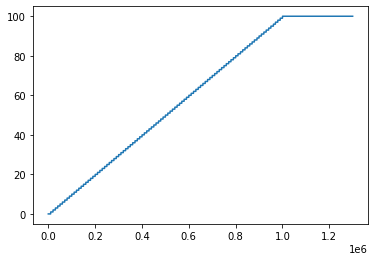

In [16]:
y = js
x = range(len(y))
plt.plot(x, y)
plt.show()

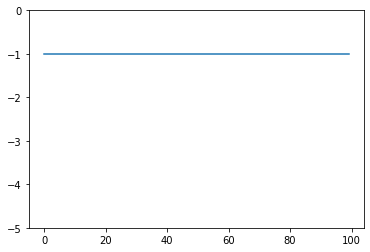

In [8]:
x = range(100)
Xs = np.log([level.get_X for level in levels])
y = Xs[1:] - Xs[:-1]
plt.ylim(-5, 0)
plt.plot(x, y)
plt.show()

In [9]:
print([level.bound for level in levels])
print([level.index for level in levels])
print([level.get_X for level in levels])

[0.0, 3.512792148704381e-94, 7.372400655911676e-92, 4.748756938922434e-88, 1.5155961837539397e-86, 1.6080066104651149e-83, 1.0183206598296623e-81, 1.2617245776883831e-79, 2.6714869144689517e-77, 9.53257559977384e-76, 1.0410775474591417e-73, 4.993601999509347e-72, 1.1495837197350678e-70, 1.0636667511629956e-68, 4.2568432856991184e-67, 9.792722692960794e-66, 6.11671721373949e-64, 2.0418219848008012e-62, 3.494988426174903e-61, 1.5409371791629112e-59, 6.734857992778805e-58, 1.163312450927835e-56, 2.348505303804639e-55, 6.008945300489533e-54, 8.208650791293548e-53, 1.3327010121370131e-51, 1.5512198626729898e-50, 5.190070754012073e-49, 1.4320220872026273e-47, 1.9392753273417924e-46, 4.2200952042195905e-45, 1.2206519360571328e-43, 2.1379483016375924e-42, 3.6522260064031415e-41, 3.9888008404778615e-40, 4.2442285121585964e-39, 6.899716462158127e-38, 1.1358738389771971e-36, 1.4008830994155612e-35, 2.7042639486230596e-34, 2.7019612942938056e-33, 3.933668293746767e-32, 3.7453614355251836e-31, 3.83

In [20]:
l1 = levels[9].level_weight(90, 10.0, 100, 100000)
l2 = levels[10].level_weight(90, 10.0, 100, 100000)
print(l1)
print(l2)
print(l2[0] / l1[0])

(2.45960311115695, 9985, 245960.311115695)
(7.389056098930648, 10090, 738905.6098930648)
3.004166023946432


In [19]:
np.exp(-1)

0.36787944117144233

In [17]:
chain['x'][-1]

array([ 0.03048876, -0.00077643,  0.01078027, -0.02483698,  0.01817291,
       -0.04748608, -0.05616293, -0.05709617,  0.02172032,  0.05900702,
       -0.07907768,  0.01321623, -0.05262935, -0.01690149, -0.05688408,
       -0.00231795, -0.00087683,  0.07157304,  0.08649422,  0.02253305])